In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import eval

find two runs that have same val_acc

In [5]:
acc903 = pd.read_csv('accuracy/903.csv')
acc903.tail()
# so we are looking for non aug runs with acc = 0.8 and val_acc = 0.17

,loss,acc,val_acc
20,0.8972,0.7936,0.1587
21,0.8789,0.7989,0.1473
22,0.8646,0.8031,0.1633
23,0.8557,0.8059,0.1672
24,0.8510,0.8073,0.1725


In [11]:
pd.read_csv('accuracy/811.csv').iloc[4:7]

,loss,acc,val_acc
4,1.0839,0.7396,0.1313
5,0.7835,0.8311,0.1579
6,0.6612,0.8685,0.1787


In [13]:
pd.read_csv('accuracy/813.csv').iloc[4:8]

,loss,acc,val_acc
4,1.0829,0.7390,NaN
5,0.8742,0.8016,0.1514
6,0.7515,0.8390,NaN
7,0.6693,0.8640,0.1769


In [5]:
acc1 = pd.read_csv('accuracy/914.csv')
acc2 = pd.read_csv('accuracy/813.csv')

plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 19})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("influence of LR")
plt.xlabel('epochs')
ax2 = ax.twinx()
ax.plot(acc1['loss'], 'g-', label = 'LR = .02')
ax2.plot(acc1['acc'], 'g', linestyle='dashdot',label = 'acc' )
ax2.plot(acc1['val_acc'], 'g', linestyle='dashed',label = 'val_acc')

ax.plot(acc2['loss'], 'r-', label = 'LR =  .005')
ax2.plot(acc2['acc'], 'r', linestyle='dashdot',label = 'acc' )
ax2.plot(acc2['val_acc'], 'r',linestyle='dashed', label = 'val_acc')


ax.legend(loc = 'right', shadow=True)
ax.set_ylabel('loss')
ax2.set_ylabel('acc')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'accuracy/914.csv'

In [4]:
acc2['val_acc']

0        NaN
1     0.1354
2        NaN
3     0.0578
4        NaN
5     0.1514
6        NaN
7     0.1769
8        NaN
9     0.1516
10       NaN
11    0.1594
12       NaN
13    0.1751
14       NaN
15    0.1925
16       NaN
17    0.1796
18       NaN
19    0.1832
20       NaN
21    0.1898
22       NaN
23    0.1896
24       NaN
Name: val_acc, dtype: float64

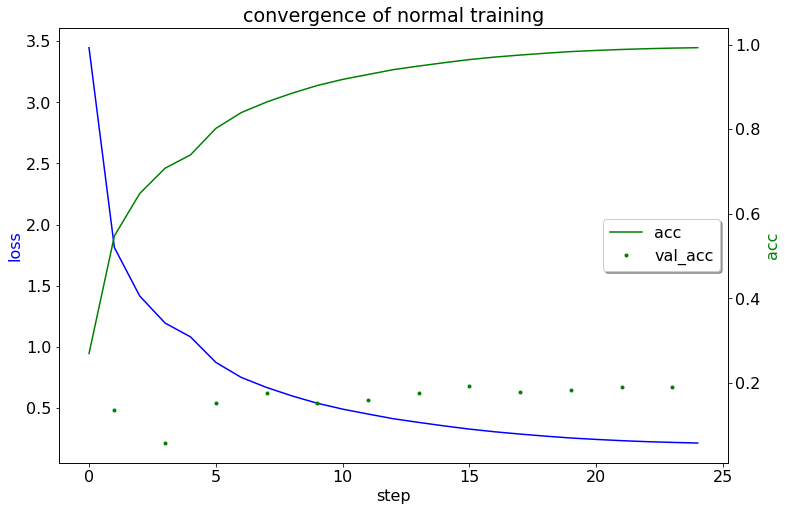

In [51]:
# plot convergence for non aug
acc813 = pd.read_csv('accuracy/813.csv')

plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("convergence of normal training")
plt.xlabel('step')

ax2 = ax.twinx()
ax.plot(acc813['loss'], 'b-', label = 'loss')
ax2.plot(acc813['acc'], 'g-', label = 'acc' )
ax2.plot(acc813['val_acc'], 'g.', label = 'val_acc')
plt.legend(loc = 'right', shadow=True)
ax.set_ylabel('loss', color='b')
ax2.set_ylabel('acc', color='g')

plt.show()

In [34]:
res_813 = pd.read_csv('../runs/813/813_results.csv')
res_903 = pd.read_csv('../runs/903/903_results.csv')

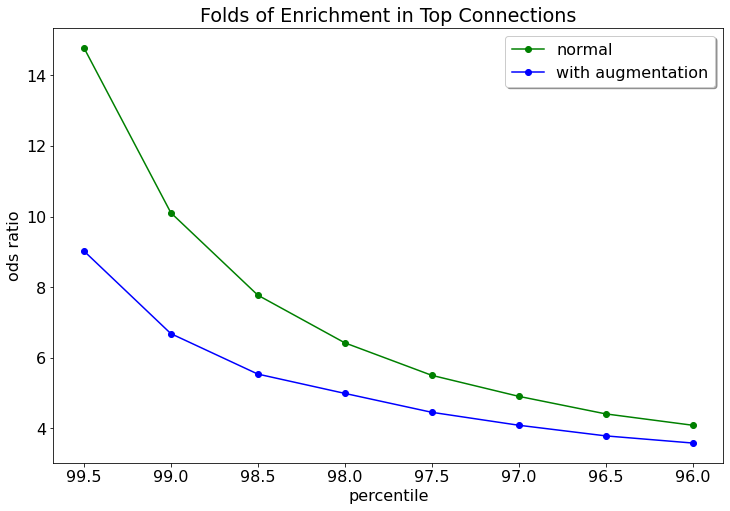

In [36]:
#%matplotlib qt
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*res_813["enrichment_percentile"], res_813["ods_ratio"], marker="o", color="green", label = 'normal')
plt.plot(100*res_903["enrichment_percentile"], res_903["ods_ratio"], marker="o", color="blue", label = 'with augmentation')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

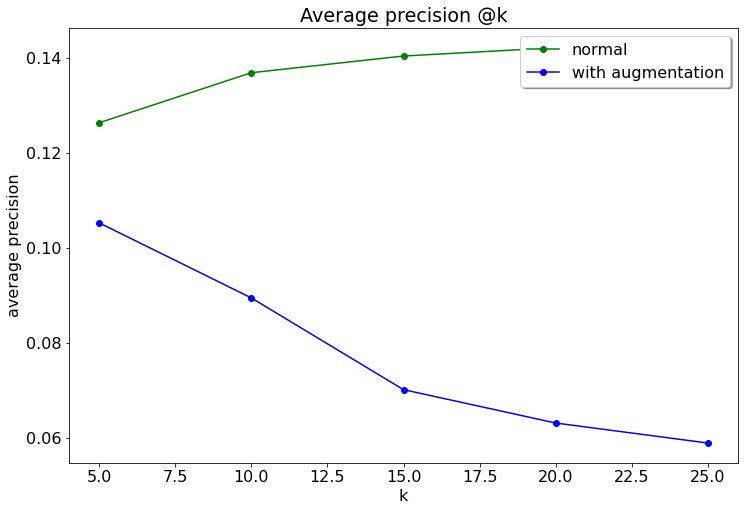

In [38]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(res_813["k"], res_813["precision"], marker="o", color="green", label = 'normal')
plt.plot(res_903["k"], res_903["precision"], marker="o", color="blue", label = 'with augmentation')
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'upper right', shadow=True)
plt.show()

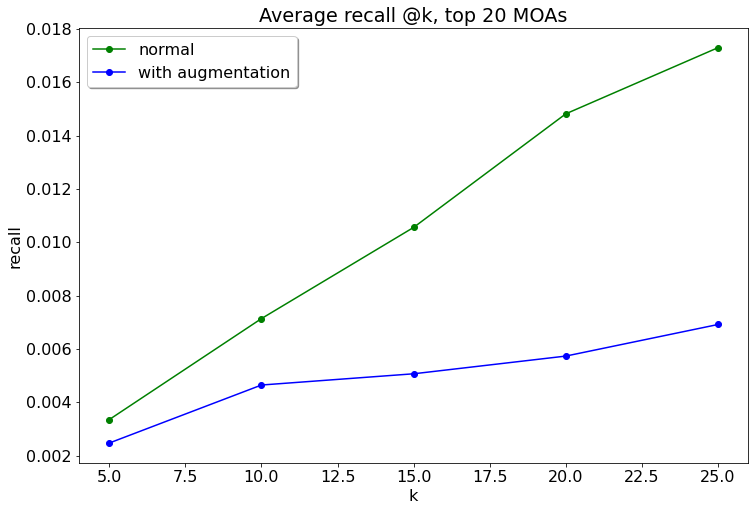

In [62]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average recall @k, top 20 MOAs")
plt.plot(res_813["k"], res_813["recall"], marker="o", color="green", label = 'normal')
plt.plot(res_903["k"], res_903["recall"], marker="o", color="blue", label = 'with augmentation')
plt.ylabel('recall')
plt.xlabel('k')
plt.legend(loc = 'upper left', shadow=True)
plt.show()

In [ ]:
# Also calculate Hit@k to be super sure.

In [52]:
e = eval.evaluation(df_path= '/Users/mbornhol/git/neural-profiling/training/runs/903/903_aggregated_median.csv')
con = e.norm_agg()
hit_ls_aug = e.eval(con, operation = 'hit@k')

1280 features were identified
running hit@k


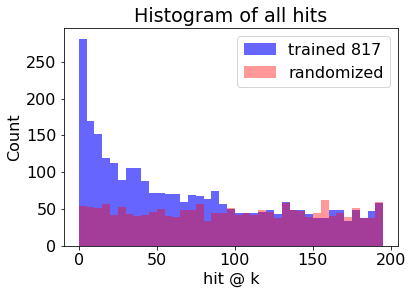

{50: 816, 75: 929, 100: 1011}

In [53]:
e = eval.evaluation(df_path= '/Users/mbornhol/git/neural-profiling/training/runs/813/813_aggregated_median.csv')
con = e.norm_agg()
hit_ls = e.eval(con, operation = 'hit@k')

1280 features were identified
running hit@k


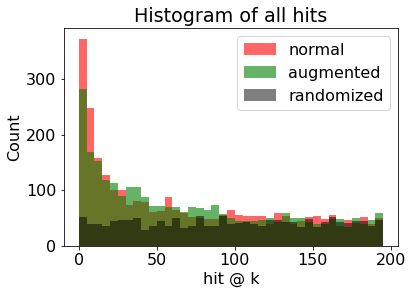

In [58]:
bins = np.arange(0,200,5)
plt.style.use({'figure.facecolor':'white'})
plt.hist(hit_ls[0], bins, alpha=0.6, color='red', label='normal')
plt.hist(hit_ls_aug[0], bins, alpha=0.6, color='green', label='augmented')
plt.hist(hit_ls[1], bins,alpha=0.5, color='black', label='randomized')
plt.xlabel('hit @ k')
plt.ylabel('Count')
plt.title('Histogram of all hits')
plt.legend()
plt.show()

In [59]:
hit_ls[2]

{50: 985, 75: 1115, 100: 1165}

In [60]:
hit_ls_aug[2]



{50: 890, 75: 998, 100: 1091}